In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start = '2012-02-10'
end = '2023-03-06'

df = data.DataReader ('TSLA','stooq',start,end)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-03-06,198.540,198.6000,192.30,193.81,128100106
2023-03-03,194.795,200.4800,192.88,197.79,154193277
2023-03-02,186.740,193.7499,186.01,190.90,181979154
2023-03-01,206.210,207.2000,198.52,202.77,156852790
2023-02-28,210.590,211.2300,203.75,205.71,153144912


In [4]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2012-02-16,2.23333,2.30067,2.16933,2.27933,31178250
2012-02-15,2.20667,2.29400,2.15133,2.24000,40337115
2012-02-14,2.10933,2.25267,2.09333,2.21133,27161625
2012-02-13,2.10333,2.13733,2.06000,2.09933,17367870
2012-02-10,2.15067,2.15133,1.98933,2.07333,28154625


In [5]:
df = df.reset_index()

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2023-03-06,198.540,198.6000,192.30,193.81,128100106
1,2023-03-03,194.795,200.4800,192.88,197.79,154193277
2,2023-03-02,186.740,193.7499,186.01,190.90,181979154
3,2023-03-01,206.210,207.2000,198.52,202.77,156852790
4,2023-02-28,210.590,211.2300,203.75,205.71,153144912


In [7]:
df=df.drop(['Date'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,198.540,198.6000,192.30,193.81,128100106
1,194.795,200.4800,192.88,197.79,154193277
2,186.740,193.7499,186.01,190.90,181979154
3,206.210,207.2000,198.52,202.77,156852790
4,210.590,211.2300,203.75,205.71,153144912


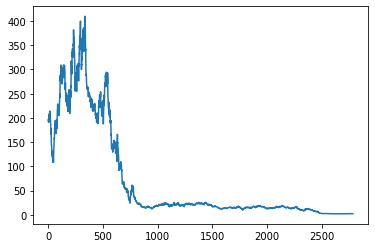

In [8]:
plt.plot(df.Close)

In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2779    2.172360
2780    2.173913
2781    2.175033
2782    2.175366
2783    2.175280
Name: Close, Length: 2784, dtype: float64

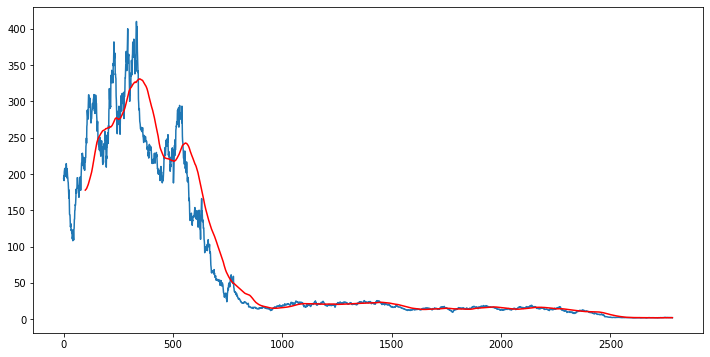

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2779    2.081796
2780    2.081456
2781    2.081239
2782    2.080505
2783    2.079802
Name: Close, Length: 2784, dtype: float64

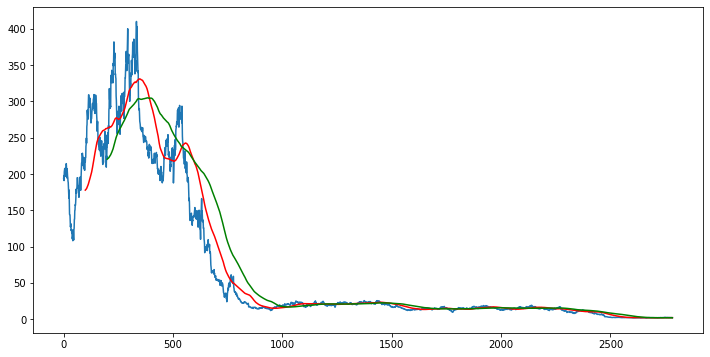

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape

(2784, 5)

In [14]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1948, 1)
(836, 1)


In [15]:
data_training.head()

,Close
0,193.81
1,197.79
2,190.90
3,202.77
4,205.71


In [16]:
data_testing.head()

,Close
1948,17.0667
1949,17.0860
1950,16.6093
1951,16.3947
1952,16.5993


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.46012907],
       [0.47006933],
       [0.4528612 ],
       ...,
       [0.01781929],
       [0.01793917],
       [0.01782079]])

In [19]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)


In [20]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [21]:
model = Sequential()

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 60)           14880     
                                                                 
 dropout (Dropout)           (None, 100, 60)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           22200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           41920     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
58/58 [==============================] - 29s 364ms/step - loss: 0.0257
Epoch 2/50
58/58 [==============================] - 20s 351ms/step - loss: 0.0076
Epoch 3/50
58/58 [==============================] - 19s 334ms/step - loss: 0.0063
Epoch 4/50
58/58 [==============================] - 19s 326ms/step - loss: 0.0054
Epoch 5/50
58/58 [==============================] - 18s 302ms/step - loss: 0.0054
Epoch 6/50
58/58 [==============================] - 19s 326ms/step - loss: 0.0045
Epoch 7/50
58/58 [==============================] - 19s 327ms/step - loss: 0.0054
Epoch 8/50
58/58 [==============================] - 22s 381ms/step - loss: 0.0044
Epoch 9/50
58/58 [==============================] - 21s 371ms/step - loss: 0.0044
Epoch 10/50
58/58 [==============================] - 20s 342ms/step - loss: 0.0052
Epoch 11/50
58/58 [==============================] - 19s 329ms/step - loss: 0.0047
Epoch 12/50
58/58 [==============================] - 19s 326ms/step - loss: 0.0041
Epoch 13/50
5

In [24]:
model.save('keras_model1.h5')

In [25]:
data_testing.head()

,Close
1948,17.0667
1949,17.0860
1950,16.6093
1951,16.3947
1952,16.5993


In [26]:
data_training.tail(100)

,Close
1848,14.1087
1849,14.1973
1850,14.0233
1851,14.3507
1852,13.9393
...,...
1943,16.8747
1944,16.6920
1945,16.7127
1946,16.7607


In [27]:
past_100_days = data_training.tail(100)

In [28]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\dasta\AppData\Local\Temp\ipykernel_2712\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [29]:
final_df.head()

,Close
0,14.1087
1,14.1973
2,14.0233
3,14.3507
4,13.9393


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[7.13744929e-01],
       [7.18857657e-01],
       [7.08816859e-01],
       [7.27709717e-01],
       [7.03969578e-01],
       [7.14091164e-01],
       [7.07818550e-01],
       [7.19128874e-01],
       [7.77105827e-01],
       [7.72910620e-01],
       [7.50982440e-01],
       [7.33941936e-01],
       [7.43059443e-01],
       [7.28938849e-01],
       [7.48599193e-01],
       [7.71796899e-01],
       [7.91953512e-01],
       [8.28498554e-01],
       [8.46543138e-01],
       [8.52007871e-01],
       [8.22422141e-01],
       [8.55198998e-01],
       [8.48464739e-01],
       [8.55314410e-01],
       [8.87935462e-01],
       [9.11825636e-01],
       [9.03902639e-01],
       [9.03440993e-01],
       [9.15980449e-01],
       [9.02211861e-01],
       [9.07786235e-01],
       [9.08478704e-01],
       [8.75090165e-01],
       [8.73624440e-01],
       [8.62279492e-01],
       [8.55504839e-01],
       [8.57160993e-01],
       [8.54316100e-01],
       [8.30310515e-01],
       [8.44309926e-01],


In [31]:
input_data.shape

(936, 1)

In [32]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [33]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(836, 100, 1)
(836,)


In [34]:
y_predicted = model.predict(x_test)

27/27 [==============================] - 4s 129ms/step


In [35]:
y_predicted.shape

(836, 1)

In [36]:
y_test

array([8.84438494e-01, 8.85552215e-01, 8.58043891e-01, 8.45660240e-01,
       8.57466834e-01, 8.55008569e-01, 8.59238400e-01, 8.64431916e-01,
       8.66930574e-01, 8.51465437e-01, 8.51580849e-01, 8.52619552e-01,
       8.44506125e-01, 8.39618450e-01, 8.50351716e-01, 8.56543542e-01,
       8.56889776e-01, 8.38654764e-01, 8.35117402e-01, 8.41118799e-01,
       8.20921791e-01, 8.09842290e-01, 8.10575153e-01, 7.86067527e-01,
       7.95762091e-01, 7.86373368e-01, 7.69142435e-01, 7.69217453e-01,
       7.93840490e-01, 7.86257956e-01, 7.90378146e-01, 7.39902939e-01,
       7.40555014e-01, 7.43786535e-01, 7.05204480e-01, 6.89277697e-01,
       6.95123288e-01, 6.94777054e-01, 6.99122296e-01, 6.97702735e-01,
       7.06624041e-01, 7.10934660e-01, 7.07818550e-01, 6.98510615e-01,
       6.81504735e-01, 6.80927677e-01, 6.34376461e-01, 6.21259947e-01,
       6.25801388e-01, 6.32726077e-01, 6.11294167e-01, 6.32068231e-01,
       6.47071722e-01, 6.75618750e-01, 6.67580341e-01, 6.61613568e-01,
      

In [37]:
y_predicted

array([[0.8010541 ],
       [0.7996361 ],
       [0.80269456],
       [0.8066031 ],
       [0.8078902 ],
       [0.80659246],
       [0.803496  ],
       [0.80010104],
       [0.7979437 ],
       [0.7978033 ],
       [0.7982011 ],
       [0.7982067 ],
       [0.79758835],
       [0.7958667 ],
       [0.79293686],
       [0.79022396],
       [0.7891659 ],
       [0.7901627 ],
       [0.79123944],
       [0.7909944 ],
       [0.7896656 ],
       [0.78630066],
       [0.78053856],
       [0.77342296],
       [0.7647395 ],
       [0.75625503],
       [0.7489277 ],
       [0.7424272 ],
       [0.7369504 ],
       [0.73464966],
       [0.73570836],
       [0.73960185],
       [0.7411555 ],
       [0.73832333],
       [0.73181677],
       [0.7212807 ],
       [0.7074995 ],
       [0.6925289 ],
       [0.6785673 ],
       [0.66763395],
       [0.6612794 ],
       [0.66043675],
       [0.664806  ],
       [0.6722933 ],
       [0.67962795],
       [0.6834243 ],
       [0.68264043],
       [0.675

In [38]:
scaler.scale_

array([0.05770574])

In [39]:
scale_factor = 1/0.00690691
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

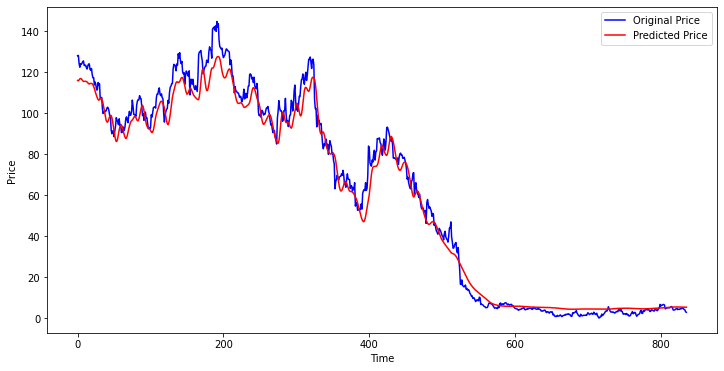

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error

# Rescale the predicted and actual values
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print('RMSE:', rmse)

RMSE: 899.5922608654125


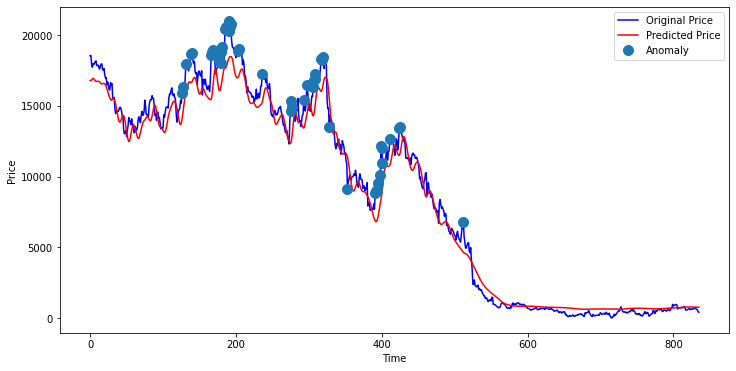

In [42]:
# calculate prediction errors
prediction_errors = np.abs(y_test - y_predicted.reshape(-1))

# calculate anomaly threshold as 3 times the standard deviation of the prediction errors
anomaly_threshold = np.std(prediction_errors) * 3

# find anomalies
anomalies = np.where(prediction_errors > anomaly_threshold)[0]

# plot results with anomalies highlighted
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.plot(anomalies, y_test[anomalies], 'o', markersize=10, label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [43]:
# Import necessary libraries
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from pyod.models.cblof import CBLOF
from pyod.models.lmdd import LMDD

# LOF
lof_model = LocalOutlierFactor(n_neighbors=20)
lof_model.fit(y_test.reshape(-1, 1))
y_scores_lof = lof_model.negative_outlier_factor_

# Random Forest
forest_model = IsolationForest(n_estimators=100, contamination=0.1)
forest_model.fit(y_test.reshape(-1, 1))
y_scores_forest = forest_model.decision_function(y_test.reshape(-1, 1))

# One-Class SVM
svm_model = OneClassSVM(kernel='rbf', nu=0.1)
svm_model.fit(y_test.reshape(-1, 1))
y_scores_svm = svm_model.decision_function(y_test.reshape(-1, 1))

# CBLOF
cblof_model = CBLOF(contamination=0.1, check_estimator=False, random_state=0)
cblof_model.fit(y_test.reshape(-1, 1))
y_scores_cblof = cblof_model.decision_function(y_test.reshape(-1, 1))

# LDCOF
ldcof_model = LMDD(contamination=0.1, random_state=0)
ldcof_model.fit(y_test.reshape(-1, 1))
y_scores_ldcof = ldcof_model.decision_function(y_test.reshape(-1, 1))


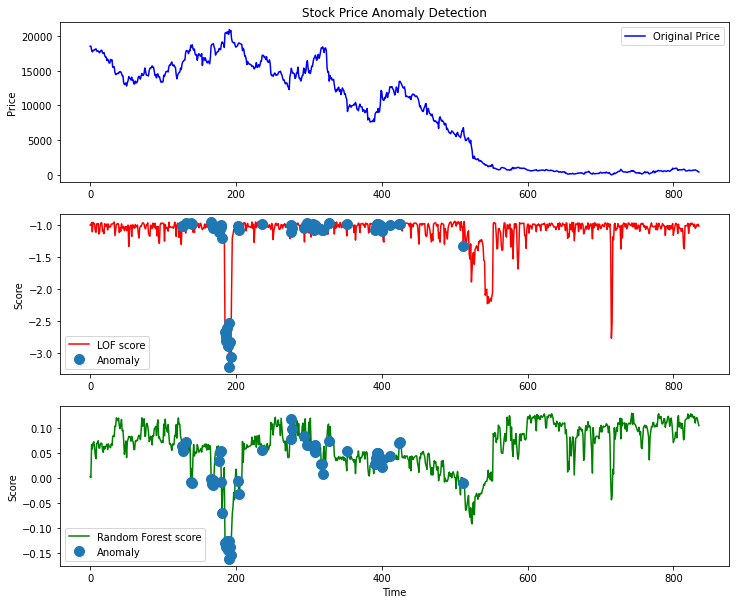

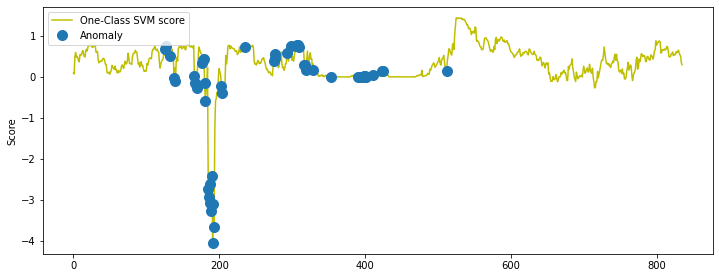

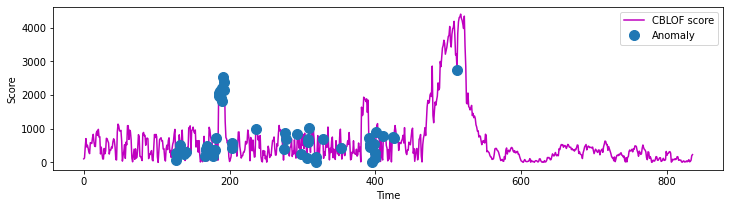

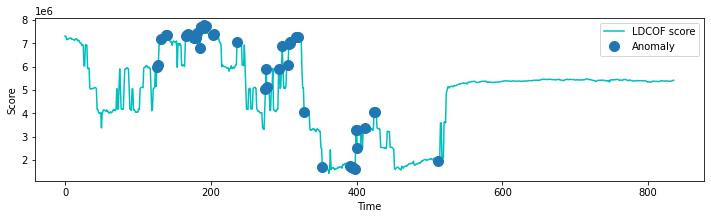

In [53]:
# calculate prediction errors
prediction_errors = np.abs(y_test - y_predicted.reshape(-1))

# calculate anomaly threshold as 3 times the standard deviation of the prediction errors
anomaly_threshold = np.std(prediction_errors) * 3

# find anomalies
anomalies = np.where(prediction_errors > anomaly_threshold)[0]

# plotting

# Figure 1
plt.figure(figsize=(12, 10))

# Subplot 1 - Original Price
plt.subplot(311)
plt.plot(y_test, 'b', label='Original Price')
plt.legend()
plt.ylabel('Price')
plt.title('Stock Price Anomaly Detection')

# Subplot 2 - LOF score
plt.subplot(312)
plt.plot(y_scores_lof, 'r', label='LOF score')
plt.plot(anomalies, y_scores_lof[anomalies], 'o', markersize=10, label='Anomaly')
plt.legend()
plt.ylabel('Score')

# Subplot 3 - Random Forest score
plt.subplot(313)
plt.plot(y_scores_forest, 'g', label='Random Forest score')
plt.plot(anomalies, y_scores_forest[anomalies], 'o', markersize=10, label='Anomaly')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Time')
plt.show()

# Figure 2
plt.figure(figsize=(12, 10))

# Subplot 1 - One-Class SVM score
plt.subplot(211)
plt.plot(y_scores_svm, 'y', label='One-Class SVM score')
plt.plot(anomalies, y_scores_svm[anomalies], 'o', markersize=10, label='Anomaly')
plt.legend()
plt.ylabel('Score')

# Subplot 3 - CBLOF score
plt.figure(figsize=(12, 3))
plt.plot(y_scores_cblof, 'm', label='CBLOF score')
plt.plot(anomalies, y_scores_cblof[anomalies], 'o', markersize=10, label='Anomaly')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Time')
plt.show()

# Subplot 4 - LDCOF score
plt.figure(figsize=(12, 3))
plt.plot(y_scores_ldcof, 'c', label='LDCOF score')
plt.plot(anomalies, y_scores_ldcof[anomalies], 'o', markersize=10, label='Anomaly')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Time')
plt.show()
